11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MNIST CNN Accuracy: 0.9894000291824341
MNIST CNN Loss: 0.03130832687020302


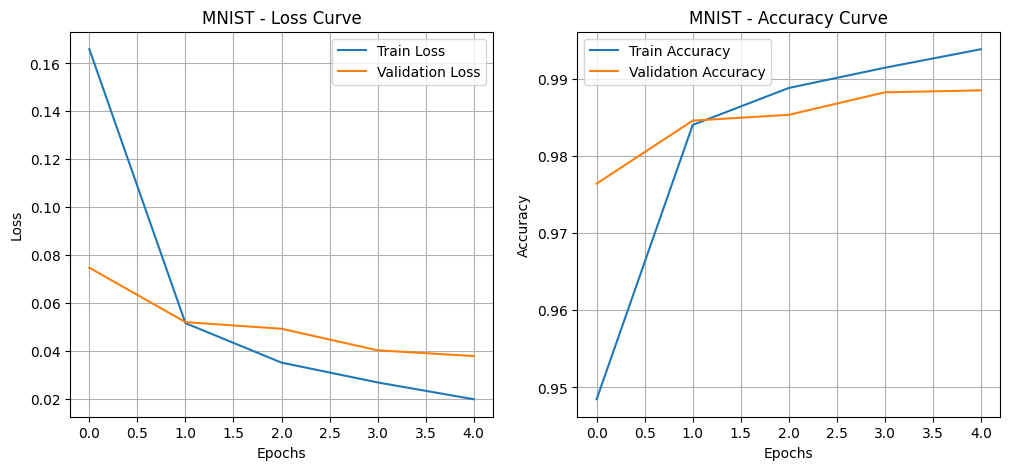

In [1]:
# ----------------------------------------------------------
# CNN on MNIST Dataset – Accuracy + Loss + Graphs
# ----------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# ----------------------------------------------------------
# 1. Load MNIST dataset
# ----------------------------------------------------------
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape (60000, 28, 28, 1)
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test  = X_test.reshape(-1, 28, 28, 1) / 255.0

# One-hot encoding
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)

# ----------------------------------------------------------
# 2. Build CNN Model
# ----------------------------------------------------------
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ----------------------------------------------------------
# 3. Training
# ----------------------------------------------------------
history = model.fit(X_train, y_train, epochs=5, validation_split=0.2, verbose=0)

# ----------------------------------------------------------
# 4. Evaluation
# ----------------------------------------------------------
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("MNIST CNN Accuracy:", accuracy)
print("MNIST CNN Loss:", loss)

# ----------------------------------------------------------
# 5. Graphs
# ----------------------------------------------------------
plt.figure(figsize=(12,5))

# Loss Curve
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("MNIST - Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train Loss", "Validation Loss"])
plt.grid(True)

# Accuracy Curve
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("MNIST - Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train Accuracy", "Validation Accuracy"])
plt.grid(True)

plt.show()
